In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd drive/MyDrive/'Colab Notebooks'/telugu_nlp

/content/drive/MyDrive/Colab Notebooks/telugu_nlp


In [ ]:
!pip install indic-nlp-library
!pip install inltk

In [4]:
 import matplotlib.pyplot as plt
 from sklearn.cluster import KMeans
 from sklearn.metrics import silhouette_score
 from sklearn.preprocessing import StandardScaler
 from sklearn.utils import shuffle


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [5]:
stothram_file = open('aigiri.txt', 'r')
stothram_txt = stothram_file.read()
stothram_file.close()

chalisa_file = open('hanuman_chalisa.txt', 'r')
chalisa_txt = chalisa_file.read()
chalisa_file.close()

In [6]:
pattern_list = []

def get_sloka_from_stothram(stothram_txt):
  slokams = []
  for sloka in stothram_txt.split('||'):
    if not sloka.replace(' ', '').isnumeric() and not sloka == '\n' and not sloka == '':
      slokams.append( sloka.replace('|', '').replace('\n', '') )
  return slokams

def gen_patterns(slokams):
  global pattern_list
  for sloka in slokams:
    temp = {}
    for words in sloka.split():
      for char in words:
        if char in temp.keys():
          temp[char] = temp[char] + 1
        else:
          temp[char] = 1 
    pattern_list.append(temp)

def to_find_accuracy(predicted, actual):
  if len(predicted) == len(actual):
    right = 0
    for i in range(len(actual)):
      if predicted[i] == actual[i]:
        right = right + 1
    print('accuracy: ', right/len(actual))

In [7]:
aigiri = get_sloka_from_stothram(stothram_txt)
chalisa = get_sloka_from_stothram(chalisa_txt)

In [8]:
gen_patterns(aigiri)
gen_patterns(chalisa)

In [ ]:
df = pd.DataFrame(pattern_list).fillna(0)
df

In [10]:
x = df.values
y = np.concatenate((np.ones(21), np.zeros(21)))

In [ ]:
x, y = shuffle(x, y)

In [11]:
preprocessor = Pipeline(
    [
      ("scaler", MinMaxScaler()),
      ("pca", PCA(n_components=2, random_state=42)),
    ]
   )

In [12]:
clusterer = Pipeline(
   [
       (
           "kmeans",
           KMeans(
               n_clusters = 2,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,
           ),
       ),
   ]
)

In [13]:
pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("clusterer", clusterer)
    ]
)

In [ ]:
pipe.fit(x)

In [15]:
to_find_accuracy(pipe["clusterer"]["kmeans"].labels_, y)

accuracy:  1.0


In [16]:
preprocessed_data = pipe["preprocessor"].transform(x)
predicted_labels = pipe["clusterer"]["kmeans"].labels_

silhouette_score(preprocessed_data, predicted_labels)

0.7223524749093777

In [17]:
adjusted_rand_score(y, predicted_labels)

1.0

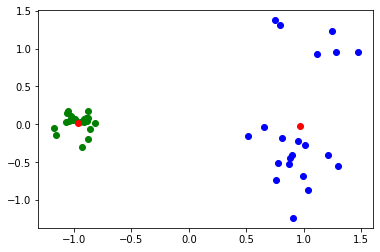

In [20]:
plt.plot( preprocessed_data[21:, 0], preprocessed_data[21:, 1], 'og', preprocessed_data[:21, 0] , preprocessed_data[:21, 1], "ob", pipe["clusterer"]["kmeans"].cluster_centers_[:, 0], pipe["clusterer"]["kmeans"].cluster_centers_[:, 1], 'or' )
plt.show() 

In [19]:
pipe["clusterer"]["kmeans"].cluster_centers_

array([[-0.96524892,  0.02311122],
       [ 0.96524892, -0.02311122]])